In [1]:
using DifferentialEquations
using Plots

In [2]:
function lorenz!(du,u,p,t)
    x,y,z = u
    σ,ρ,β = p
    
    du[1] = dx = σ*(y-x)
    du[2] = dy = x*(ρ-z) - y
    du[3] = dz = x*y - β*z
end

lorenz! (generic function with 1 method)

In [3]:
u0 = [1.0;0.0;0.0]
tspan = (0.0,1.0)
param=[10.0, 28.0, 8/3]
prob = ODEProblem(lorenz!,u0,tspan,param)
sol=solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 28-element Array{Float64,1}:
 0.0
 3.5678604836301404e-5
 0.0003924646531993154
 0.0032624077544510573
 0.009058075635317072
 0.01695646895607931
 0.0276899566248403
 0.041856345938267966
 0.06024040228733675
 0.08368539694547242
 0.11336497050342806
 0.14862178548871152
 0.18703974465019643
 ⋮
 0.37221152547525677
 0.4201372705729432
 0.4637203592547958
 0.5049460289663918
 0.5570622537949965
 0.6068387449874374
 0.6690203938696947
 0.7276640840586802
 0.798854234447563
 0.8763207996400417
 0.9661628933695969
 1.0
u: 28-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]
 [0.9996434557625105, 0.0009988049817849058, 1.781434788799208e-8]
 [0.9961045497425811, 0.010965399721242457, 2.146955365838907e-6]
 [0.9693591634199452, 0.08977060667778931, 0.0001438018342266937]
 [0.9242043615038835, 0.24228912482984957, 0.0010461623302512404]
 [0.8800455868998046, 0.43873645009348244, 0.0034242593451028745]
 [0.84833098777

In [4]:
u0=sol.u[end]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan,param)
sol=solve(prob)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 1276-element Array{Float64,1}:
   0.0
   0.0643212998173729
   0.12146049375600403
   0.19404894194474215
   0.2741028434949973
   0.3763294534562411
   0.47642405263600096
   0.5862338131757949
   0.6889702298685345
   0.8137510825197651
   0.9188908394845217
   1.0604124384245877
   1.1767908269282734
   ⋮
  99.22024114623642
  99.28138344136775
  99.34996736602218
  99.42505175481546
  99.5169515396852
  99.59466806892196
  99.66916182333932
  99.74301506480711
  99.81291495286696
  99.88460024620092
  99.97127652893508
 100.0
u: 1276-element Array{Array{Float64,1},1}:
 [-9.395403780701917, -9.093416304499454, 28.553652185231734]
 [-8.996304644165681, -8.115195082683018, 28.73842072687945]
 [-8.43238478410594, -7.404436687691967, 28.24645181694211]
 [-7.771691211804133, -7.056393785346572, 27.094715956612436]
 [-7.462783722695311, -7.433832934524049, 25.80792961701246]
 [-7.8842781272262386, -8.68183492781534

In [5]:
gr()

Plots.GRBackend()

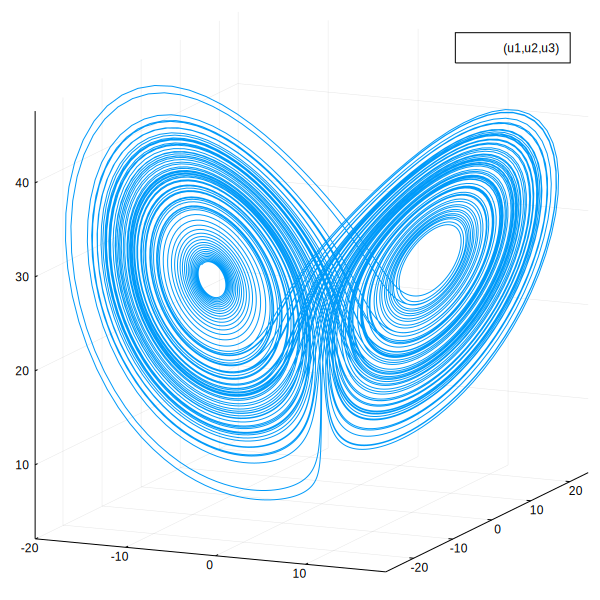

In [6]:
plot(sol,vars=(1,2,3),size=(600,600))


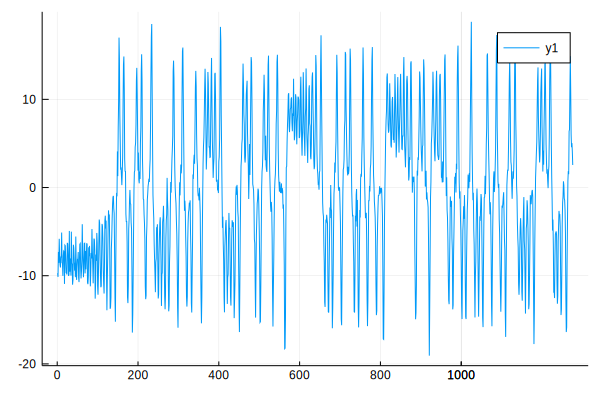

In [7]:
z=sol[1,:]+randn(size(sol[1,:]))
plot(z)

In [8]:
cd("/Users/michael/work/GitHub/place")

In [33]:
include("Place.jl")

Main.Place

In [10]:
zin=z;

In [34]:
mymodel, X, z = Place.buildmodel(zin);

In [12]:
ϕ, offset = Place.placebo(X, mymodel.rbf)

([1.0 -9.717905738688298 … 0.0 0.9811584240502385; 1.0 -10.136686892550346 … 0.0 0.9829399830227598; … ; 1.0 7.119878963042782 … 0.0 0.28642288364204954; 1.0 3.2714538766988572 … 0.0 0.3104785695628095], 5)

In [13]:
size(mymodel.λ)

(30,)

In [14]:
myλ = ϕ\z

30-element Array{Float64,1}:
   -2.6013463188060415
   -0.12595412709416665
   -0.03276572832102901
   -0.07399839975892936
    0.8326251975351302
  -30.17460525603808
  -92.08756168688625
 -172.81823659821842
  -52.49924632369685
  -39.72252891801943
    4.223710555041971
  -10.841816833182955
   20.01796783823674
    ⋮
   52.08786851562543
   62.33349890580477
   30.589388470659117
   20.557592089261416
   -3.685560984888805
   17.133858697189687
  123.24167399603303
  132.32720791608477
   18.0320068500616
   91.48262457231901
  -61.17793401486907
  537.3229142586698

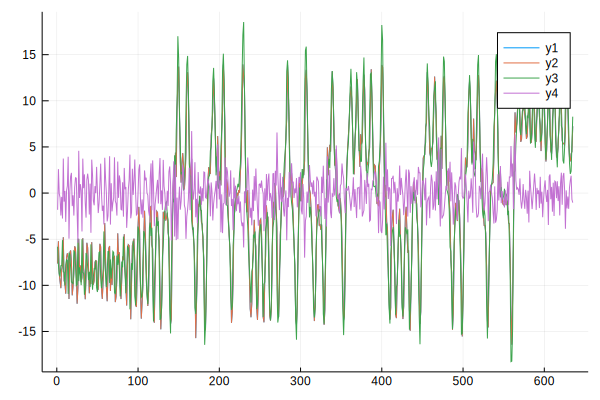

In [15]:
plot(ϕ[:,mymodel.basis]*mymodel.λ)
plot!(ϕ*myλ)
plot!(z)
plot!(ϕ[:,mymodel.basis]*mymodel.λ-z)

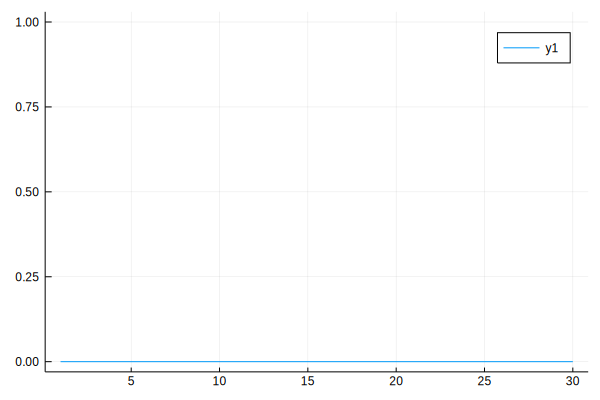

In [16]:
plot(mymodel.λ-myλ[mymodel.basis])

In [17]:
yt,yp,ep = Place.predict(mymodel,z)

([-10.303918212881285, -8.302366408711805, -7.858344283447877, -4.787991533110812, -9.49951253144991, -9.787085883527311, -10.903672603875407, -6.968810983484104, -6.526201028660353, -6.993998505804484  …  6.705102391733163, 12.824687831467388, 11.389816044739243, 9.363966187725945, 5.409828381579807, 3.8540450643951396, 3.4340960053726, 4.252996446905108, 4.485729561224844, 7.243261620702356], [-7.874181296511001, -7.8872146312592015, -5.100858682174979, -8.52856024566231, -8.570279365653658, -10.017538216425452, -7.7733330854855165, -7.218083121515536, -7.300667448594585, -10.929977169294137  …  10.57812182684772, 12.53005212166922, 13.053162835269896, 9.734719688564269, 7.119878963042782, 3.2714538766988572, 2.0770541354517804, 2.37408771855714, 5.170305162222562, 8.28059479717745], [-2.4297369163702847, -0.41515177745260345, -2.757485601272898, 3.7405687125514984, -0.9292331657962514, 0.2304523328981407, -3.1303395183898903, 0.249272138031432, 0.7744664199342326, 3.935978663489653 

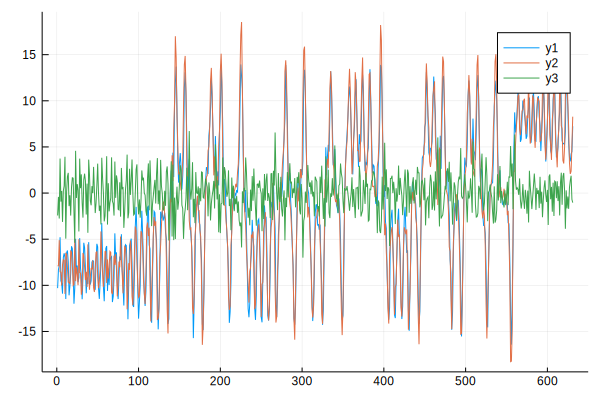

In [18]:
plot(yt)
plot!(yp)
plot!(ep)

In [36]:
yp=Place.freerun(mymodel,z)

632-element Array{Float64,1}:
 -8.62756159673313
 -9.18638898848593
 -7.87611923297537
 -6.839846510625669
 -7.185849551189655
 -8.252457735157556
 -8.617268469046572
 -7.4417865185201535
 -6.646113545912286
 -7.824961544206531
 -8.95153621452755
 -7.723823638689822
 -7.544166403247459
  ⋮
 -7.403800537957835
 -7.884367428617047
 -8.276522607989044
 -8.095376417734336
 -7.032362679203494
 -7.251952631859908
 -7.7106595933123
 -9.008051909302218
 -7.443669171549537
 -7.183410545092002
 -7.107993733364957
  0.29387360568730286

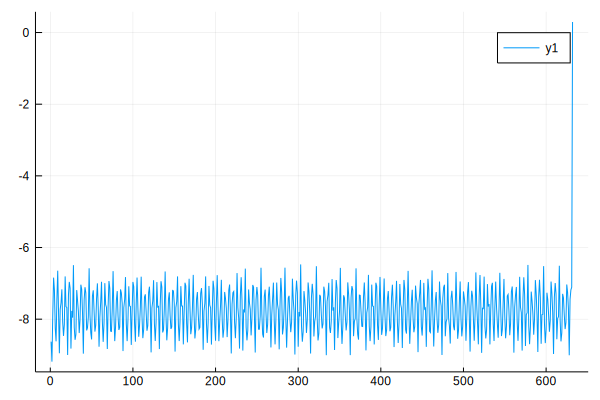

In [37]:
plot(yp)